In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import time
import scipy.linalg as la
from scipy.stats import zscore
import seaborn as sns
from tqdm import trange
import biosfa
import math

# Figure 10

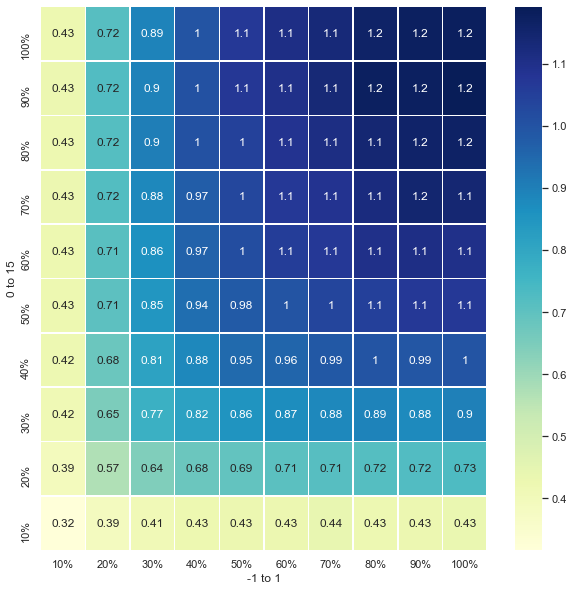

In [2]:
file = open('data.txt', 'r')
lines = file.read().splitlines()

y = np.array(lines).astype(np.float)

size = 8771
y = y[0:size]
res_10p_noise = ""
res_100p_noise = ""

y1_lower = 0
y1_upper = 15
y2_lower = -1
y2_upper = 1

y1_abs = abs(y1_lower) + abs(y1_upper)
y2_abs = abs(y2_lower) + abs(y2_upper)

x = np.linspace(1, len(y), len(y))

y1 = np.interp(y, (y.min(), y.max()), (y1_lower, y1_upper))
y2 = np.interp(y, (y.min(), y.max()), (y2_lower, y2_upper))

count_x = 0
count_y = 0

res = np.zeros((10, 10))
for f in range(1, 11, 1):
    count_y = 0
    for s in range(1, 11, 1):
        gaussian_noise = np.random.normal(0.0, y1_abs*(f/10), len(x))
        y1_noise = zscore(y1 + gaussian_noise)
        gaussian_noise = np.random.normal(0.0, y2_abs*(s/10), len(x))
        y2_noise = zscore(y2 + gaussian_noise)

        signal = np.zeros((size, 2))

        for i in range(len(signal)):
            signal[i][0] = y1_noise[i]
            signal[i][1] = y2_noise[i]

        signal = signal - np.mean(signal, axis=0)
        signal = signal @ la.inv(la.sqrtm(np.cov(signal.T)))

        X = np.zeros((2,size))
        X[0:2,:] = signal.T

        X_dot = X[:,1:size] - X[:,0:size-1]

        Cxx = np.cov(X)
        Cxx_dot = np.cov(X_dot)

        evals_dot, evecs_dot = la.eigh(Cxx_dot, Cxx)

        slow_gevp = evecs_dot[:,0] @ X

        y = zscore(y)
        slow_gevp = zscore(-slow_gevp)
        if f == 1 and s == 1:
            res_10p_noise = slow_gevp
        if f == 10 and s == 10:
            res_100p_noise = slow_gevp
        

        dif_sum = 0
        for i in range(len(slow_gevp)):
            dif_sum += (slow_gevp[i] - y[i])**2
        rmse = math.sqrt(dif_sum/len(slow_gevp))
        res[count_x][count_y] = rmse
        count_y += 1
    count_x += 1
sns.set(rc={'figure.figsize':(10,10)})
xticks = ["10%","20%","30%","40%","50%","60%","70%","80%","90%","100%"]
yticks = ["10%", "20%","30%","40%","50%","60%","70%","80%","90%","100%"]
g = sns.heatmap(res, linewidths=.5, cmap="YlGnBu", xticklabels=xticks,yticklabels=yticks, annot=True)
g.invert_yaxis()
plt.xlabel("-1 to 1")
plt.ylabel("0 to 15")
plt.show()

# Figure 11

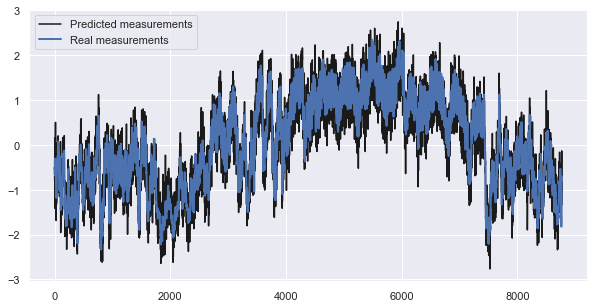

In [3]:
plt.figure(figsize=(10, 5))
plt.plot(res_10p_noise, "k", label="Predicted measurements")
plt.plot(zscore(y), lw=2, label="Real measurements")
plt.legend()
plt.show()

# Figure 12

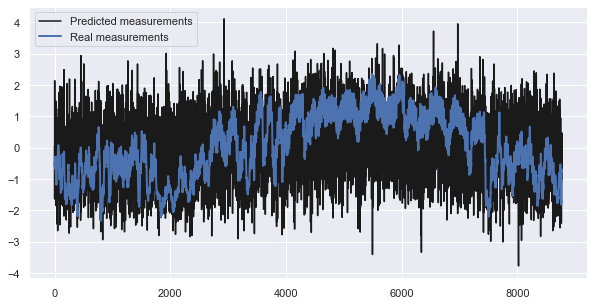

In [4]:
plt.figure(figsize=(10, 5))
plt.plot(res_100p_noise, "k", label="Predicted measurements")
plt.plot(zscore(y), lw=2, label="Real measurements")
plt.legend()
plt.show()

# Figure 13

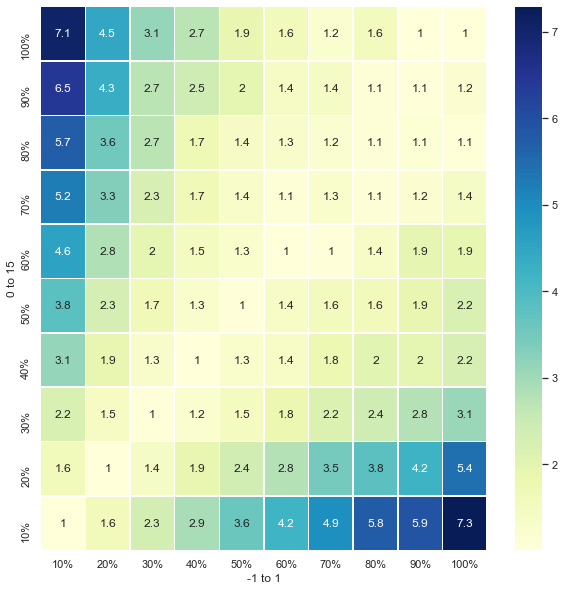

In [5]:
file = open('data.txt', 'r')
lines = file.read().splitlines()

y = np.array(lines).astype(np.float)

size = 8771
y = y[0:size]

y1_lower = 0
y1_upper = 15
y2_lower = -1
y2_upper = 1

y1_abs = abs(y1_lower) + abs(y1_upper)
y2_abs = abs(y2_lower) + abs(y2_upper)

x = np.linspace(1, len(y), len(y))

y1 = np.interp(y, (y.min(), y.max()), (y1_lower, y1_upper))
y2 = np.interp(y, (y.min(), y.max()), (y2_lower, y2_upper))

count_x = 0
count_y = 0

res = np.zeros((10, 10))
for f in range(1, 11, 1):
    count_y = 0
    for s in range(1, 11, 1):
        gaussian_noise = np.random.normal(0.0, y1_abs*(f/10), len(x))
        y1_noise = zscore(y1 + gaussian_noise)
        gaussian_noise = np.random.normal(0.0, y2_abs*(s/10), len(x))
        y2_noise = zscore(y2 + gaussian_noise)

        signal = np.zeros((size, 2))

        for i in range(len(signal)):
            signal[i][0] = y1_noise[i]
            signal[i][1] = y2_noise[i]

        signal = signal - np.mean(signal, axis=0)
        signal = signal @ la.inv(la.sqrtm(np.cov(signal.T)))

        X = np.zeros((2,size))
        X[0:2,:] = signal.T

        X_dot = X[:,1:size] - X[:,0:size-1]

        Cxx = np.cov(X)
        Cxx_dot = np.cov(X_dot)

        evals_dot, evecs_dot = la.eigh(Cxx_dot, Cxx)

        slow_gevp = evecs_dot[:,0] @ X

        y = zscore(y)
        slow_gevp = zscore(-slow_gevp)

        dif_sum = 0
        for i in range(len(slow_gevp)):
            dif_sum += (slow_gevp[i] - y[i])**2
        rmse = math.sqrt(dif_sum/len(slow_gevp))
        if evecs_dot[0][0] > evecs_dot[0][1]:
            res[count_x][count_y] = str(evecs_dot[0][1] / evecs_dot[0][0])
        else:
            res[count_x][count_y] = evecs_dot[0][0] / evecs_dot[0][1]
        count_y += 1
    count_x += 1
sns.set(rc={'figure.figsize':(10,10)})
xticks = ["10%","20%","30%","40%","50%","60%","70%","80%","90%","100%"]
yticks = ["10%", "20%","30%","40%","50%","60%","70%","80%","90%","100%"]
g = sns.heatmap(res, linewidths=.5, cmap="YlGnBu", xticklabels=xticks,yticklabels=yticks, annot=True)
g.invert_yaxis()
plt.xlabel("-1 to 1")
plt.ylabel("0 to 15")
plt.show()